In [1]:
import matplotlib.pyplot as plt
plt.style.use('thesis')
import numpy as np

In [2]:
root = '/data/mustard/vmehta/sfhz_1000_20260113_093133'
real = np.vstack(np.load(f'{root}/snr__all_true.npy'))
real = np.hstack((10**real[:,:10], real[:,10:]))
pred = np.vstack(np.load(f'{root}/snr__all_pred.npy'))
pred = np.hstack((10**pred[:,:10], pred[:,10:]))
wav = np.load(f'{root}/sfhz_1000_20260113_093133_wavelength.npy')

bin_arr = np.r_[np.array([0.1, 20, 50, 100, 200, 500])*1e6, np.logspace(9.5, 10.15, 5)]
binning = np.log10(bin_arr)
bin_widths = np.diff(binning)
bin_centers = binning[:-1] + bin_widths/2

In [3]:
def get_percentiles(pred, real, relative=False):
    if relative:
        diff = (pred - real) / real
    else:
        diff = pred - real

    median = np.median(diff, axis=0)
    sixteen = np.percentile(diff, 16, axis=0)
    eightyfour = np.percentile(diff, 84, axis=0)

    return median, sixteen, eightyfour

In [7]:
real_sfh = real[:,:10]
real_z = real[:,10:]
pred_sfh = pred[:,:10]
pred_z = pred[:,10:]

z_sun = 0.0142 # from FSPS documentation
real_logz = real_z + np.log10(z_sun)
pred_logz = pred_z + np.log10(z_sun)

median_sfh, sixteen_sfh, eightyfour_sfh = get_percentiles(pred_sfh, real_sfh, relative=False)
median_logz, sixteen_logz, eightyfour_logz = get_percentiles(pred_logz, real_logz, relative=False)

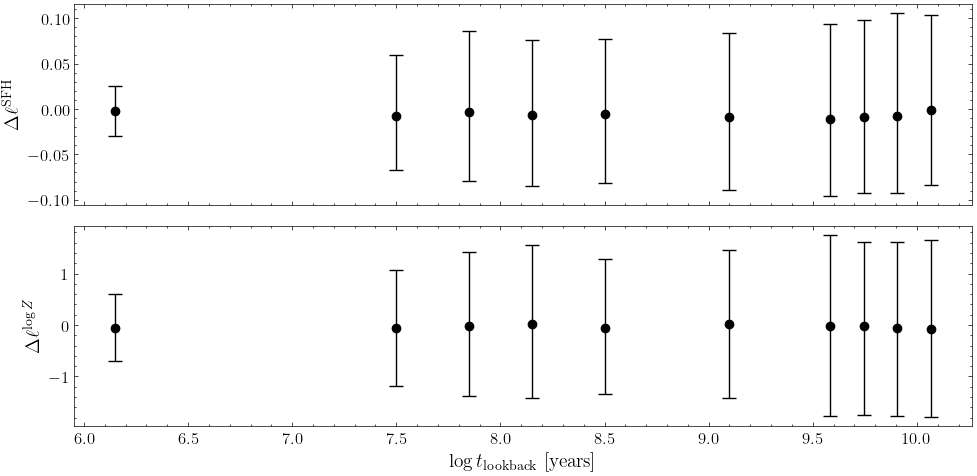

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(10,5), sharex=True)

ax[0].errorbar(bin_centers, median_sfh, yerr=[median_sfh - sixteen_sfh, eightyfour_sfh - median_sfh], color='k', fmt='o', capsize=5)
ax[0].set_ylabel('$\\Delta\\ell^\\mathrm{SFH}$')

ax[1].errorbar(bin_centers, median_z, yerr=[median_z - sixteen_z, eightyfour_z - median_z], color='k', fmt='o', capsize=5)
ax[1].set_xlabel('$\\log t_\\mathrm{lookback}$ [years]')
ax[1].set_ylabel('$\\Delta\\ell^{\\log Z}$')

plt.tight_layout()
plt.show()